<a href="https://colab.research.google.com/github/deviandinifebrianti/PCVK_Genap_2023/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama: Devi Andini Febrianti
# NIM : 214172189
# Kelas : D4TI-3H

# -------------------------------------------------------------------------------------------------------
## Tugas Praktikum

### 1. Import folder di drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pytesseract

### 2. Import Library

In [3]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

### 3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di bawah.

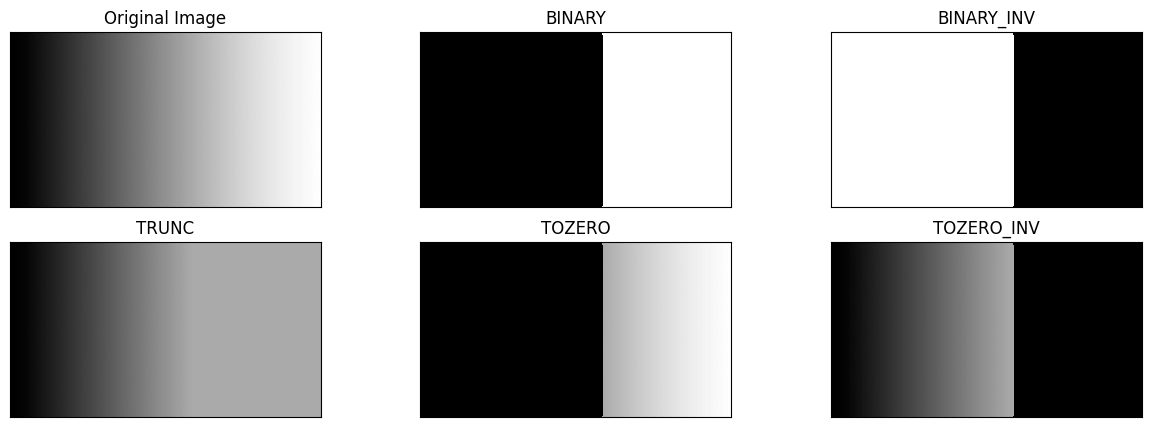

In [ ]:
from PIL import Image

# Baca gambar
img = cv2.imread('/content/drive/MyDrive/PCVK/gradient.jpg')


thresh = 170  # Nilai threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selainitu bernilai 0(hitam)
ret,thresh1 = cv2.threshold(img,thresh,255,cv2.THRESH_BINARY)

#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv2.threshold(img,thresh,255,cv2.THRESH_BINARY_INV)

#3. Threshold Truncate
ret,thresh3 = cv2.threshold(img,thresh,255,cv2.THRESH_TRUNC)

#4. Threshold Tozero
ret,thresh4 = cv2.threshold(img,thresh,255,cv2.THRESH_TOZERO)

#5. Threshold Tozero Inverse
ret,thresh5 = cv2.threshold(img,thresh,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

### 4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

<ipython-input-13-682305938a3a>:20: RuntimeWarning: invalid value encountered in divide
  mb = sumb / wb


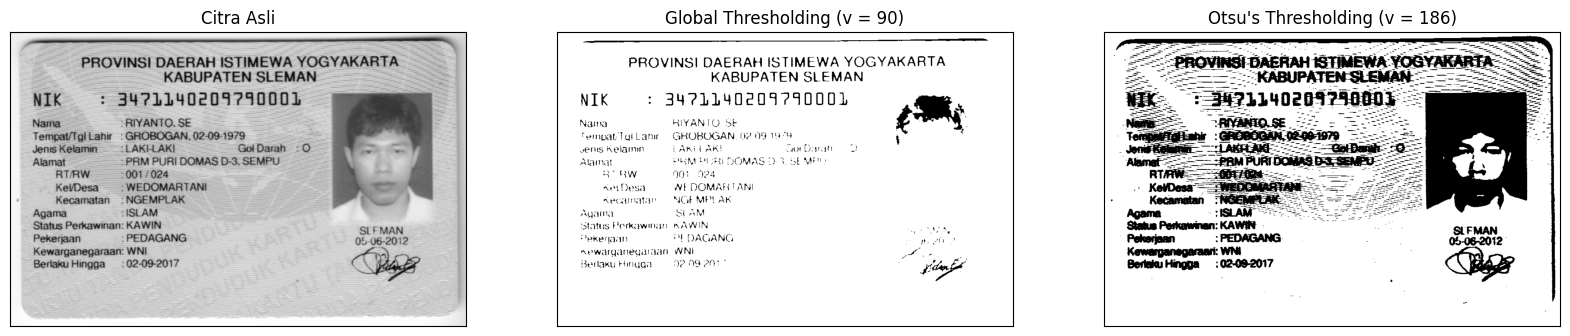

In [ ]:
dir = ('/content/drive/MyDrive/PCVK/ktp.png')

img = cv2.imread(dir,0)
blur = cv2. GaussianBlur (img, (5,5),0)

histogram = cv2.calcHist([blur],[0],None,[256], [0,256])
histogram_norm = histogram.ravel()/histogram.max()
Q = histogram_norm.cumsum()
bins = np.arange (256)
wb = 0
sumb = 0
varmax = 0
fn_min = np.inf
threshold = -1

for i in range(0,187):
  wb += histogram[i]
  wf = (img.shape[0]*img.shape[1]) - wb
  sumb += (i*histogram[i])
  mb = sumb / wb
  mf = (sumb - sumb)/wf
  betweenvar = wb * wf * (mb - mf) * (mb - mf)
  if (betweenvar>varmax):
    varmax = betweenvar
    threshold = i

x = ("Otsu's Thresholding (v = ")+str(threshold)+")"
ret, thresholdGlobal = cv2.threshold(blur, 90, 255, cv2.THRESH_BINARY)
ret, thresholdOtsu = cv2.threshold(blur, threshold, 255, cv2. THRESH_BINARY)

names = ['Citra Asli', 'Global Thresholding (v = 90)', x]
images = [blur, thresholdGlobal, thresholdOtsu]

plt. figure(figsize = (20,15))
for i in range(len(names)):
    plt.subplot(1,3,i+1),plt.imshow(images[i], 'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### 5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.
### Petunjuk:
a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.

b. Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html

c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh dibawah dinamakan dengan Citra Segment).

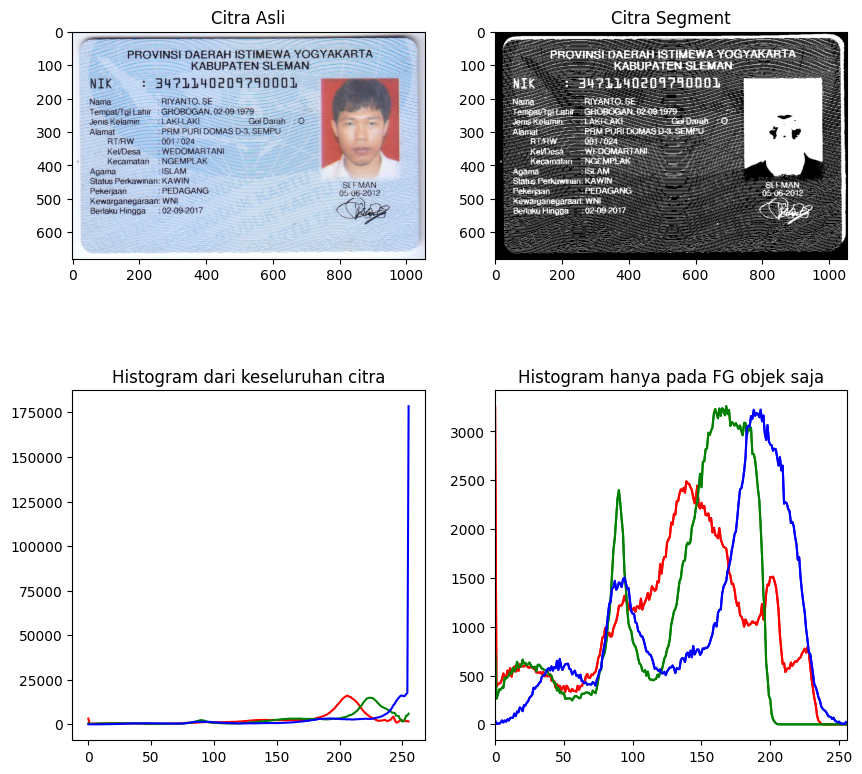

In [ ]:
filename_3 = ('/content/drive/MyDrive/PCVK/ktp.png')
img_l = cv2.imread(filename_3)
img_rgb = cv2.cvtColor(img_l,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

### 6. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)

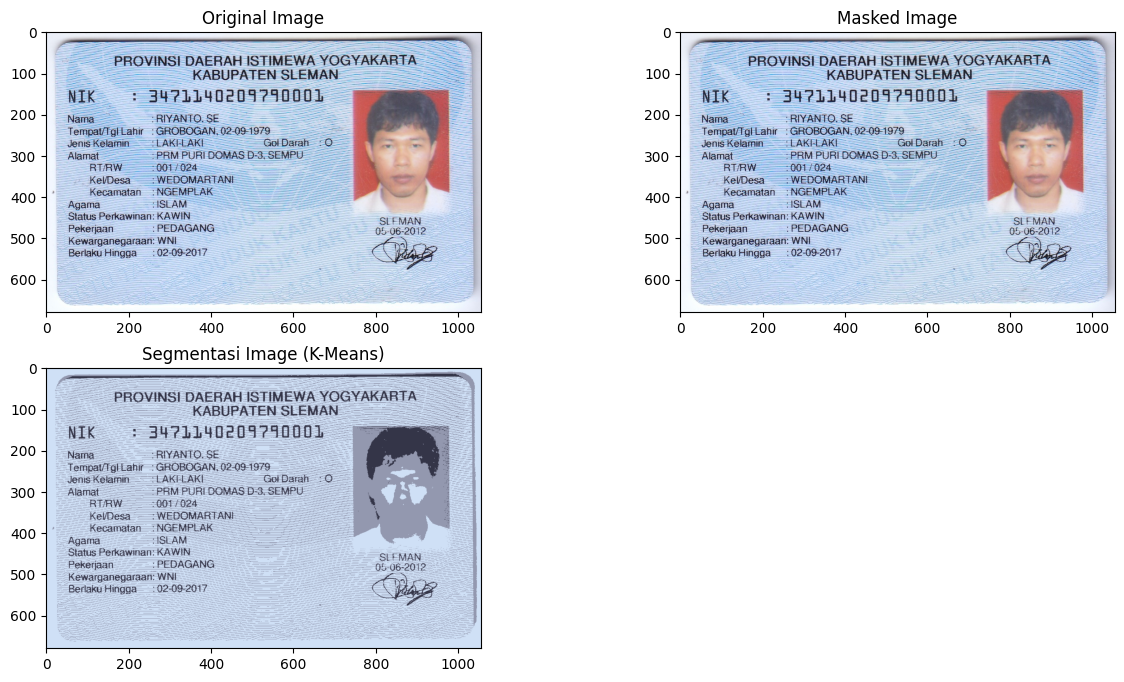

In [ ]:
from sklearn.cluster import KMeans

# Load the image
filename = '/content/drive/MyDrive/PCVK/ktp.png'
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Flatten the pixel values
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define the criteria and the number of clusters (k)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # Number of clusters

# Apply K-Means clustering
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to integers
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Create a masked image by turning one cluster into black
masked_image = np.copy(img)
masked_image = masked_image.reshape((-1, 3))
cluster_to_blue = 2
masked_image = masked_image.reshape(img.shape)

# Convert the segmented image back to the original shape
segmented_image = centers[labels].reshape(img.shape)


# Display the original image, segmented image, and masked image
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.title('Original Image')

plt.subplot(2, 2, 2), plt.imshow(masked_image)
plt.title('Masked Image')

plt.subplot(2, 2, 3), plt.imshow(segmented_image)
plt.title('Segmentasi Image (K-Means)')

plt.show()

### TUGAS

In [1]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 9 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 1s (9,029 kB/s)
debconf: unable to init

Teks Hasil Pembacaan:
Oe
PROVINS! DAERAH ISTIMEWA YOGYAKARTA

 

KABUPATEN SLEMAN

NIK >: 347113490209790001
Nama /RIYANTO. SE
Tempat/Tg! Lahr : GROBOGAN, 02-09-1979
Jens Kelamin =: LAKI-LAKI GolDarah :O
Alamat : PRM PURI DOMAS D-3. SEMPU

RTURW :001/024

Ke¥Desa  : WEDOMARTANI

Kecamatan : NGEMPLAK
Agama :ISLAM
Status Perkawinan: KAWIN
Pekerjaan : PEDAGANG oon ye

Kewarganegaraan: WNI

Berlaku Hingga 02-09-2017 Ce



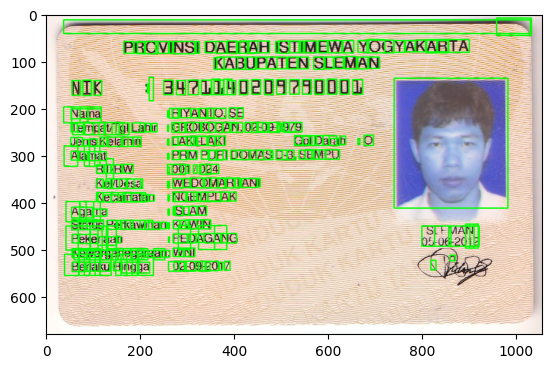

In [7]:
import cv2
import pytesseract
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# Baca gambar dari file
image = cv2.imread('/content/drive/MyDrive/PCVK/KTP/ktp.png')

# Langkah 1: Prapemrosesan gambar
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

thresholded_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Peningkatan kontras
alpha = 1.5  # Sesuaikan nilai alpha sesuai kebutuhan
beta = 0     # Sesuaikan nilai beta sesuai kebutuhan
enhanced_image = cv2.convertScaleAbs(thresholded_image, alpha=alpha, beta=beta)

# Langkah 2: Deteksi teks pada gambar
detected_text = pytesseract.image_to_string(enhanced_image)

# Langkah 3: Menampilkan teks hasil pembacaan
print("Teks Hasil Pembacaan:")
print(detected_text)

# Tampilkan gambar dengan kotak deteksi teks (opsional)
h, w = enhanced_image.shape
boxes = pytesseract.image_to_boxes(enhanced_image)
for b in boxes.splitlines():
    b = b.split()
    x, y, x2, y2 = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    cv2.rectangle(image, (x, h - y), (x2, h - y2), (0, 255, 0), 2)

# Tampilkan gambar dengan kotak deteksi teks (opsional)

plt.imshow(image)
# plt.axis('off')
plt.show()